In [1]:
import re
import gensim
from gensim.models import word2vec

In [2]:
import os
from nltk.corpus import stopwords

 # лемматизация исходного текста:
input_file = os.path.join(r'C:\Users\Maria\Documents', 'neznaika.txt')
output_file = os.path.join(r'C:\Users\Maria\Documents', 'neznaika_lem.txt')
os.system(r'C:\Users\Maria\Documents\mystem.exe  -c -d -l -i  '+ input_file + ' ' + output_file )
 # очистка каждой строчки от пунктуации и ненужных грамматических помет
new_lines = []
with open('neznaika_lem.txt', encoding='utf-8') as f:
    text = f.readlines()
for line in text:
    new_line = ''
    only_words = re.findall(r'[а-я]+=[A-Z]+', line)
    for word in only_words:
        lemma_reg = re.search(r'([а-я]+)=',word)
        lemma = lemma_reg.group(1)
        if lemma not in stopwords.words('russian'):
            new_line = new_line + ' ' + word
    new_lines.append(new_line)
with open('neznaika_clean.txt', 'w', encoding='utf-8') as r:
    for line in new_lines:
        r.write(line)
        r.write('\n')


In [3]:
# инициализация и обучение модели
data = gensim.models.word2vec.LineSentence('neznaika_clean.txt')
model_neznaika = gensim.models.Word2Vec(data, size=300, window=5, min_count=2, workers=2)

c:\users\maria\appdata\local\programs\python\python36-32\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [4]:
model_neznaika.init_sims(replace=True)
model_path = "neznaika.bin"


model_neznaika.wv.save_word2vec_format(model_path, binary=True)

c:\users\maria\appdata\local\programs\python\python36-32\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [5]:
import networkx as nx

nodes1 = ['тело=S', 'нога=S'] 
G = nx.Graph() 
G.add_nodes_from(nodes1) # добавляем несколько узлов 

In [6]:
 # для слов "тело" и "нога" ищем соседей, проверяя частеречное соответствие
nodes2 = []
for word in nodes1:
    reg_pos = re.search(r'=([A-Z]+)', word)
    pos = reg_pos.group(1)
    for i in model_neznaika.most_similar(positive=[word], topn=20):
        reg_pos = re.search(r'=([A-Z]+)', i[0])
        word_pos = reg_pos.group(1)
        if i[1]>0.5 and word_pos == pos:
            G.add_edge(word,i[0])
            nodes2.append(i[0])


c:\users\maria\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [7]:
# для слов, найденных на предыдущих шагах, ищутся соседи
for word in nodes2:
    reg_pos = re.search(r'=([A-Z]+)', word)
    pos = reg_pos.group(1)
    for i in model_neznaika.most_similar(positive=[word], topn=20):
        reg_pos = re.search(r'=([A-Z]+)', i[0])
        word_pos = reg_pos.group(1)
        if i[1]>0.5 and word_pos == pos:
            G.add_edge(word,i[0])


c:\users\maria\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """


In [10]:
deg1 = nx.degree_centrality(G)
print(sorted(deg1, key=deg1.get, reverse=True)[0])
deg2 = nx.betweenness_centrality(G)
print(sorted(deg2, key=deg2.get, reverse=True)[0])
deg3 = nx.closeness_centrality(G)
print(sorted(deg3, key=deg3.get, reverse=True)[0])
deg4 = nx.eigenvector_centrality(G)
print(sorted(deg4, key=deg4.get, reverse=True)[0])

незнайка=S
незнайка=S
незнайка=S
знайка=S


In [11]:
# вычисление необходимых метрик графа 
print(nx.density(G))
print(nx.diameter(G))
print(nx.radius(G))
print(nx.average_clustering(G))
print(nx.degree_pearson_correlation_coefficient(G))

0.3399014778325123
4
2
0.5120765602616782
-0.12051921154980794


In [21]:
from networkx.algorithms import community

com = community.greedy_modularity_communities(G)
for set in com:
    print(set)

frozenset({'малышка=S', 'синеглазка=S', 'площадка=S', 'рука=S', 'ворчун=S', 'волос=S', 'гвоздик=S', 'медуница=S', 'малыш=S', 'машина=S', 'стол=S', 'нога=S', 'винтик=S'})
frozenset({'брюки=S', 'э=S', 'пончик=S', 'цветик=S', 'арбуз=S', 'тело=S', 'голова=S', 'шурупчик=S', 'незнайка=S', 'авоська=S', 'ворота=S'})
frozenset({'краска=S', 'край=S', 'знайка=S', 'корзина=S', 'забор=S'})


Можно заметить, что одушевленные предметы попали в первое сообщество (кроме слов "знайка" и "незнайка")
Во второй группе содержатся предметы, означающие еду ("арбуз", "цветик"), и также вместе "тело" и "голова", что радует. "Рука" и "нога" попали, почему-то, в первую группу
Слова, означающие предметы, например "авоська", разделены на сообщества очень странно, без какого-то формального правила

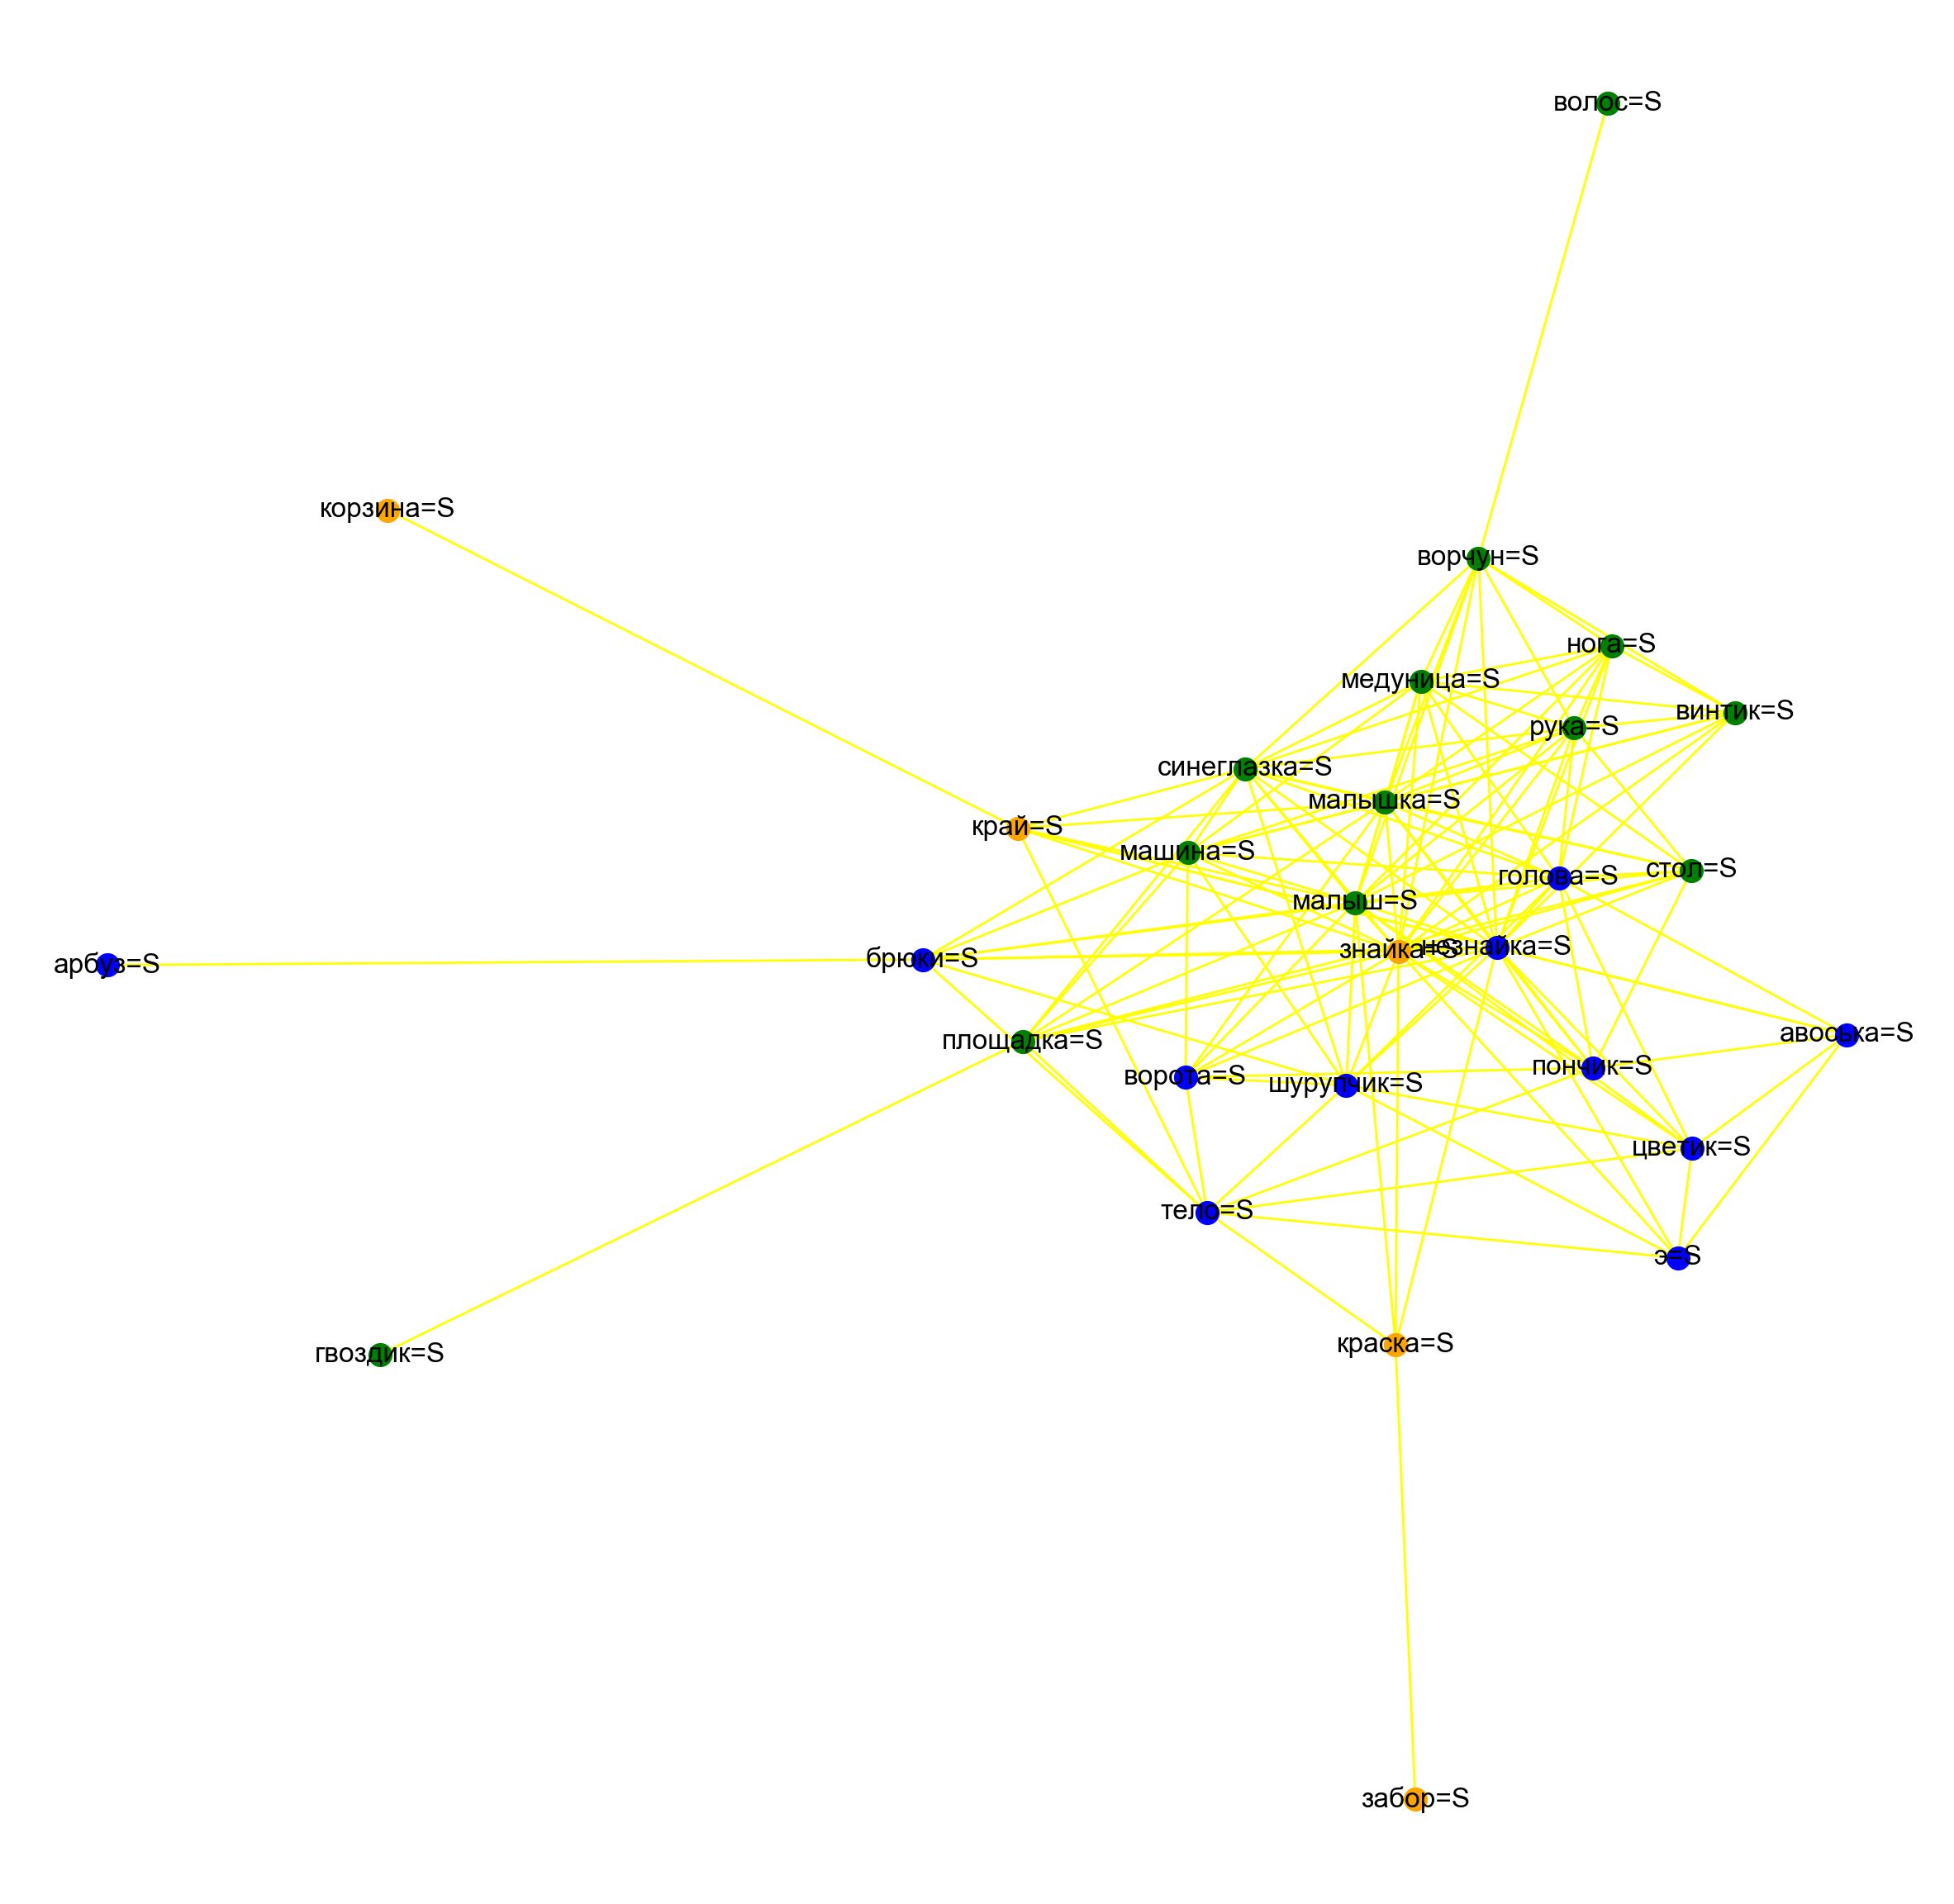

In [40]:
import matplotlib.pyplot as plt
from matplotlib import style
from PIL import Image
style.use('ggplot') 
pos=nx.spring_layout(G)
plt.figure(figsize=(15, 15), dpi=200)
nx.draw_networkx_nodes(G, pos, com[0], node_color='green', node_size=100) 
nx.draw_networkx_nodes(G, pos, com[1], node_color='blue', node_size=100) 
nx.draw_networkx_nodes(G, pos, com[2], node_color='orange', node_size=100) 
nx.draw_networkx_edges(G, pos, edge_color='yellow')
nx.draw_networkx_labels(G, pos, font_size=12, font_family='Arial')
plt.axis('off')
plt.show()

# разными цветами отмечена принадлежность узлов к разным сообществам